Načtení knihoven.

In [1]:
import sympy as sp
import numpy as np

Nastavení tisknutelného výstupu.

In [2]:
sp.init_printing()

Zavedení symbolů.

In [3]:
r=sp.symbols('r',real=True,positive=True)
t=sp.symbols('t',real=True)
ur=sp.Function('u_r')
ut=sp.Function('u_theta')
nr=sp.Function('nr')
nt=sp.Function('nt')
lmb,mu,nu=sp.symbols('lmb mu nu',real=True)
l=sp.symbols('l',real=True)
p=sp.symbols('p')
nu=sp.symbols('nu',real=True)
A1,A2,A3,A4=sp.symbols('A_1 A_2 A_3 A_4')
B1,B2,B3,B4=sp.symbols('B_1 B_2 B_3 B_4')
Gamma1,Gamma2,Gamma3,Gamma4=sp.symbols('Gamma_1 Gamma_2 Gamma_3 Gamma4')
nuII=sp.symbols('nu',real=True)
nu12=sp.symbols('l12',real=True)
sxx,sxy,syy=sp.symbols('s_xx s_xy s_yy')

### Složky gradientu posuvů

\begin{equation}
  \nabla\otimes\boldsymbol{u}=\left[
    \begin{array}{ll}
      \partial_ru_r & \partial_ru_\theta \\
      \frac{1}{r}(\partial_\theta u_r-u_\theta) & \frac{1}{r}(u_r+\partial_\theta u_\theta)
    \end{array}
                              \right]
\end{equation}

In [4]:
drur=sp.diff(ur(r,t),r)
drut=sp.diff(ut(r,t),r)
dtur=1/r*(sp.diff(ur(r,t),t)-ut(r,t))
dtut=1/r*(ur(r,t)+sp.diff(ut(r,t),t))

### Složky deformace

\begin{equation}
  \boldsymbol{S}=\frac{1}{2}(\nabla\otimes\boldsymbol{u}+\boldsymbol{u}\otimes\nabla)
                    =\left[
      \begin{array}{ll}
        \partial_ru_r & \frac{1}{2}\partial_ru_\theta+\frac{1}{2r}(-u_\theta+\partial_\theta u_r) \\
        \frac{1}{2}\partial_ru_\theta+\frac{1}{2r}(-u_\theta+\partial_\theta u_r) &
        \frac{1}{r}(u_r+\partial_\theta u_\theta)
      \end{array}
                     \right]
\end{equation}
                 

In [5]:
Srr=sp.diff(ur(r,t),r)
Srt=sp.Rational(1,2)*sp.diff(ut(r,t),r)+sp.Rational(1,2)/r*(-ut(r,t)+sp.diff(ur(r,t),t))
Stt=1/r*(ur(r,t)+sp.diff(ut(r,t),t))

### Konstitutivní vztahy

\begin{equation}
  \begin{split}
    \nabla\mathrm{Tr}(\boldsymbol{S}) =& \left[
      \begin{array}{l}
        \partial_r(S_{rr}+S_{\theta\theta}) \\
        \frac{1}{r}\partial_\theta(S_{rr}+S_{\theta\theta})
      \end{array}
                                        \right] \\
    \nabla\cdot\boldsymbol{S} =& \left[
      \begin{array}{l}
        \partial_r S_{rr}+\frac{1}{r}S_{rr}+\frac{1}{r}\partial_\theta S_{r\theta}
        -\frac{1}{r}S_{\theta\theta} \\
        \partial_rS_{r\theta}+\frac{2}{r}S_{r\theta}
        +\frac{1}{r}\partial_\theta S_{\theta\theta}
      \end{array}
                                 \right]
  \end{split}
\end{equation}

In [6]:
gradrtrS=sp.diff(Srr+Stt,r)
gradttrS=1/r*sp.diff(Srr+Stt,t)
divrS=sp.diff(Srr,r)+1/r*Srr+1/r*sp.diff(Srt,t)-1/r*Stt
divtS=sp.diff(Srt,r)+2/r*Srt+1/r*sp.diff(Stt,t)

\begin{equation}
  \boldsymbol{T}=\lambda\mathrm{Tr}(\boldsymbol{S})\boldsymbol{I}
                 +2\mu\boldsymbol{S}
\end{equation}

In [7]:
Trr=sp.collect(sp.expand(lmb*(Srr+Stt)+2*mu*Srr),ur(r,t))
Trt=sp.simplify(2*mu*Srt)
Ttt=sp.collect(sp.expand(lmb*(Srr+Stt)+2*mu*Stt),ut(r,t))

\begin{equation}
  \begin{split}
    \nabla\otimes\boldsymbol{T} =&
      \partial_rT_{rr}\boldsymbol{e}_r\otimes\boldsymbol{e}_r\otimes\boldsymbol{e}_r
      +\partial_rT_{r\theta}\boldsymbol{e}_r\otimes\boldsymbol{e}_r\otimes\boldsymbol{e}_\theta
      +\partial_rT_{r\theta}\boldsymbol{e}_r\otimes\boldsymbol{e}_\theta\otimes\boldsymbol{e}_r
      +\partial_rT_{\theta\theta}\boldsymbol{e}_r\otimes\boldsymbol{e}_\theta\otimes\boldsymbol{e}_\theta \\
      & +\frac{1}{r}(\partial_\theta T_{rr}-2T_{r\theta})\boldsymbol{e}_\theta\otimes\boldsymbol{e}_r\otimes\boldsymbol{e}_r
      +\frac{1}{r}(T_{rr}-T_{\theta\theta}+\partial_\theta T_{r\theta})\boldsymbol{e}_\theta\otimes\boldsymbol{e}_r\otimes\boldsymbol{e}_\theta \\
      & +\frac{1}{r}(T_{rr}-T_{\theta\theta}+\partial_\theta T_{r\theta})\boldsymbol{e}_\theta\otimes\boldsymbol{e}_\theta\otimes\boldsymbol{e}_r
      +\frac{1}{r}(2T_{r\theta}+\partial_\theta T_{\theta\theta})\boldsymbol{e}_\theta\otimes\boldsymbol{e}_\theta\otimes\boldsymbol{e}_\theta
  \end{split}
\end{equation}

In [8]:
gradrTrr=sp.diff(Trr,r)
gradrTrt=sp.diff(Trt,r)
gradrTtr=sp.diff(Trt,r)
gradrTtt=sp.diff(Ttt,r)
gradtTrr=1/r*(sp.diff(Trr,t)-2*Trt)
gradtTrt=1/r*(Trr-Ttt+sp.diff(Trt,t))
gradtTtr=1/r*(Trr-Ttt+sp.diff(Trt,t))
gradtTtt=1/r*(2*Trt+sp.diff(Ttt,t))

\begin{equation}
  \boldsymbol{\hat{T}}=l^2\nabla\otimes\boldsymbol{T}
\end{equation}

In [9]:
Trrr=l**2*gradrTrr
Trrt=l**2*gradrTrt
Trtr=l**2*gradrTtr
Trtt=l**2*gradrTtt
Ttrr=l**2*gradtTrr
Ttrt=l**2*gradtTrt
Tttr=l**2*gradtTtr
Tttt=l**2*gradtTtt

### Normálová derivace, totální napětí, vektor vyšších napětí a povrchový náboj

\begin{equation}
  \begin{split}
    \boldsymbol{\nu} =& \boldsymbol{n}\cdot(\nabla\otimes\boldsymbol{u})
                        =(\boldsymbol{u}\otimes\nabla)\cdot\boldsymbol{n}, \\
    \boldsymbol{t} =& \boldsymbol{n}\cdot(\boldsymbol{T}-\nabla\cdot\hat{\boldsymbol{T}})
                      -\overset{s}{\nabla}\cdot(\boldsymbol{n}\cdot\hat{\boldsymbol{T}})
                      +(\overset{s}{\nabla}\cdot\boldsymbol{n})
                      \boldsymbol{n}\otimes\boldsymbol{n}
                        :\hat{\boldsymbol{T}} \\
                   =& \boldsymbol{n}\cdot(\boldsymbol{T}-\nabla\cdot\hat{\boldsymbol{T}})
                      -\overset{s}{\nabla}\cdot(\boldsymbol{n}\cdot\hat{\boldsymbol{T}})
                      +(\overset{s}{\nabla}\cdot\boldsymbol{n})\boldsymbol{n}
                      \cdot(\boldsymbol{n}\cdot\hat{\boldsymbol{T}}), \\
    \boldsymbol{r} =& \boldsymbol{nn}:\hat{\boldsymbol{T}}
                      =\boldsymbol{n}\cdot(\boldsymbol{n}\cdot\hat{\boldsymbol{T}}),
  \end{split}
\end{equation}

kde

\begin{equation}
  \overset{s}{\nabla}=(\boldsymbol{I}-\boldsymbol{n}\otimes\boldsymbol{n})\cdot\nabla.
\end{equation}

Pro normálu ve směru $\boldsymbol{n}\equiv\boldsymbol{e}_r$, tj. pro libovolnou polopřímku $r=konst.$, platí

\begin{equation}
  \begin{split}
    \nu_r =& \partial_ru_r \\
    \nu_\theta =& \partial_ru_\theta \\
    t_r =& T_{rr}
           -\partial_{r}\hat{T}_{rrr}-\frac{1}{r}\hat{T}_{rrr}
           -\frac{1}{r}\partial_{\theta}\hat{T}_{\theta rr}
           +\frac{1}{r}\hat{T}_{\theta r\theta}
           +\frac{1}{r}\hat{T}_{\theta\theta r}
           -\frac{1}{r}\partial_{\theta}\hat{T}_{r\theta r}
           +\frac{1}{r}\hat{T}_{r\theta\theta}, \\
    t_\theta =& T_{r\theta}
                -\partial_{r}\hat{T}_{rr\theta}
                -\frac{1}{r}\hat{T}_{rr\theta}
                -\frac{1}{r}\hat{T}_{\theta rr}
                -\frac{1}{r}\partial_{\theta}\hat{T}_{\theta r\theta}
                +\frac{1}{r}\hat{T}_{\theta\theta\theta}
                -\frac{1}{r}\partial_{\theta}\hat{T}_{r\theta\theta}
                -\frac{1}{r}\hat{T}_{r\theta r}, \\
    r_r =& \hat{T}_{rrr}, \\
    r_\theta =& \hat{T}_{rr\theta},
  \end{split}
\end{equation}

*Poznámka*: U totálního napětí $\boldsymbol{t}\equiv(t_r,t_\theta)$ se v dalším vynechají členy $T_{rr}$ a $T_{r\theta}$.

\begin{equation}
  \begin{split}
    t_r =& T_{r\theta}-\partial_r\hat{T}_{r\theta r}
           -\frac{1}{r}\hat{T}_{r\theta r}
           -\frac{1}{r}\hat{T}_{\theta rr}
           -\frac{1}{r}\partial_\theta\hat{T}_{\theta\theta r}
           +\frac{1}{r}\hat{T}_{\theta\theta\theta}
           -\partial_r\hat{T}_{\theta rr}, \\
    t_\theta =& T_{\theta\theta}-\partial_r\hat{T}_{r\theta\theta}
                -\frac{1}{r}\hat{T}_{r\theta\theta}
                -\frac{2}{r}\hat{T}_{\theta r\theta}
                -\frac{1}{r}\partial_\theta\hat{T}_{\theta\theta\theta}
                +\partial_r\hat{T}_{\theta r\theta}, \\
     \end{split}
\end{equation}

In [10]:
Ur1=Gamma2*sp.cos(2.*t)+Gamma3*sp.sin(2.*t)+Gamma1
Ut1=Gamma3*sp.cos(2.*t)-Gamma2*sp.sin(2.*t)+Gamma4

In [11]:
Ur=A1*sp.cos((p-1)*t)+A2*sp.cos((p+1)*t)+A3*sp.cos((p-3)*t) \
    +B1*sp.sin((p-1)*t)+B2*sp.sin((p+1)*t)+B3*sp.sin((p-3)*t)
Ut=B4*sp.cos((p-1)*t)+B2*sp.cos((p+1)*t) \
    +nu12*B3*sp.cos((p-3)*t) \
    +A4*sp.sin((p-1)*t)-A2*sp.sin((p+1)*t) \
    -nu12*A3*sp.sin((p-3)*t)

### Dosazení

In [12]:
drur1=drur.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
drut1=drut.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
dtur1=dtur.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
dtut1=dtut.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()

In [13]:
drur1_=sp.collect(sp.expand(drur1),[Gamma1,Gamma2,Gamma3,Gamma4])
drut1_=sp.collect(sp.expand(drut1),[Gamma1,Gamma2,Gamma3,Gamma4])
dtur1_=sp.collect(sp.expand(dtur1),[Gamma1,Gamma2,Gamma3,Gamma4])
dtut1_=sp.collect(sp.expand(dtut1),[Gamma1,Gamma2,Gamma3,Gamma4])
drur1_,drut1_,dtur1_,dtut1_

In [14]:
Trr1=Trr.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
Trt1=Trt.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
Ttt1=Ttt.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()

In [15]:
Trr1_=sp.collect(sp.expand(Trr1),[Gamma1,Gamma2,Gamma3,Gamma4])
Trt1_=sp.collect(sp.expand(Trt1),[Gamma1,Gamma2,Gamma3,Gamma4])
Ttt1_=sp.collect(sp.expand(Ttt1),[Gamma1,Gamma2,Gamma3,Gamma4])
Trr1_,Trt1_,Ttt1_

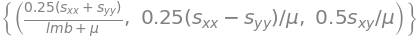

In [16]:
eqn1=Trr1_.subs(t,0)-sxx
eqn2=Trt1_.subs(t,0)-sxy
eqn3=Ttt1_.subs(t,0)-syy
sp.linsolve([eqn1,eqn2,eqn3],[Gamma1,Gamma2,Gamma3])

In [17]:
Trrr1=Trrr.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
Trrt1=Trrt.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
Trtt1=Trtt.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
Ttrr1=Ttrr.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
Ttrt1=Ttrt.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
Tttt1=Tttt.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()

In [18]:
Trrr1_=sp.collect(sp.expand(Trrr1),[Gamma1,Gamma2,Gamma3,Gamma4])
Trrt1_=sp.collect(sp.expand(Trrt1),[Gamma1,Gamma2,Gamma3,Gamma4])
Trtt1_=sp.collect(sp.expand(Trtt1),[Gamma1,Gamma2,Gamma3,Gamma4])
Ttrr1_=sp.collect(sp.expand(Ttrr1),[Gamma1,Gamma2,Gamma3,Gamma4])
Ttrt1_=sp.collect(sp.expand(Ttrt1),[Gamma1,Gamma2,Gamma3,Gamma4])
Tttt1_=sp.collect(sp.expand(Tttt1),[Gamma1,Gamma2,Gamma3,Gamma4])
Trrr1_,Trrt1_,Trtt1_,Ttrr1_,Ttrt1_,Tttt1_

In [19]:
drur_=drur.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
drut_=drut.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
dtur_=dtur.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
dtut_=dtut.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()

In [20]:
drur__=sp.collect(sp.expand(drur_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(drur__[A1],[r**p/r*sp.cos(p*t-t)]))
print("A2:",sp.collect(drur__[A2],[r**p/r*sp.cos(p*t+t)]))
print("A3:",sp.collect(drur__[A3],[r**p/r*sp.cos(p*t-3*t)]))
#print("A4:",sp.collect(drur__[A4],[r**p/r*sp.cos(p*t-t)]))
print("B1:",sp.collect(drur__[B1],[r**p/r*sp.sin(p*t-t)]))
print("B2:",sp.collect(drur__[B2],[r**p/r*sp.sin(p*t+t)]))
print("B3:",sp.collect(drur__[B3],[r**p/r*sp.sin(p*t-3*t)]))
#print("B4:",sp.collect(drur__[B4],[r**p/r*sp.sin(p*t-t)]))

A1: p*r**p*cos(p*t - t)/r
A2: p*r**p*cos(p*t + t)/r
A3: p*r**p*cos(p*t - 3*t)/r
B1: p*r**p*sin(p*t - t)/r
B2: p*r**p*sin(p*t + t)/r
B3: p*r**p*sin(p*t - 3*t)/r


In [21]:
drut__=sp.collect(sp.expand(drut_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
#print("A1:",sp.collect(drut__[A1],[r**p/r*sp.cos(p*t-t)]))
print("A2:",sp.collect(drut__[A2],[r**p/r*sp.cos(p*t+t)]))
print("A3:",sp.collect(drut__[A3],[r**p/r*sp.cos(p*t-3*t)]))
print("A4:",sp.collect(drut__[A4],[r**p/r*sp.cos(p*t-t)]))
#print("B1:",sp.collect(drut__[B1],[r**p/r*sp.sin(p*t-t)]))
print("B2:",sp.collect(drut__[B2],[r**p/r*sp.sin(p*t+t)]))
print("B3:",sp.collect(drut__[B3],[r**p/r*sp.sin(p*t-3*t)]))
print("B4:",sp.collect(drut__[B4],[r**p/r*sp.sin(p*t-t)]))

A2: -p*r**p*sin(p*t + t)/r
A3: -l12*p*r**p*sin(p*t - 3*t)/r
A4: p*r**p*sin(p*t - t)/r
B2: p*r**p*cos(p*t + t)/r
B3: l12*p*r**p*cos(p*t - 3*t)/r
B4: p*r**p*cos(p*t - t)/r


In [22]:
dtur__=sp.collect(sp.expand(dtur_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(dtur__[A1],[r**p/r*sp.cos(p*t-t)]))
print("A2:",sp.collect(dtur__[A2],[r**p/r*sp.cos(p*t+t)]))
print("A3:",sp.collect(dtur__[A3],[r**p/r*sp.cos(p*t-3*t)]))
print("A4:",sp.collect(dtur__[A4],[r**p/r*sp.cos(p*t-t)]))
print("B1:",sp.collect(dtur__[B1],[r**p/r*sp.sin(p*t-t)]))
print("B2:",sp.collect(dtur__[B2],[r**p/r*sp.sin(p*t+t)]))
print("B3:",sp.collect(dtur__[B3],[r**p/r*sp.sin(p*t-3*t)]))
print("B4:",sp.collect(dtur__[B4],[r**p/r*sp.sin(p*t-t)]))

A1: -p*r**p*sin(p*t - t)/r + r**p*sin(p*t - t)/r
A2: -p*r**p*sin(p*t + t)/r
A3: l12*r**p*sin(p*t - 3*t)/r - p*r**p*sin(p*t - 3*t)/r + 3*r**p*sin(p*t - 3*t)/r
A4: -r**p*sin(p*t - t)/r
B1: p*r**p*cos(p*t - t)/r - r**p*cos(p*t - t)/r
B2: p*r**p*cos(p*t + t)/r
B3: -l12*r**p*cos(p*t - 3*t)/r + p*r**p*cos(p*t - 3*t)/r - 3*r**p*cos(p*t - 3*t)/r
B4: -r**p*cos(p*t - t)/r


In [23]:
dtut__=sp.collect(sp.expand(dtut_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(dtut__[A1],[r**p/r*sp.cos(p*t-t)]))
print("A2:",sp.collect(dtut__[A2],[r**p/r*sp.cos(p*t+t)]))
print("A3:",sp.collect(dtut__[A3],[r**p/r*sp.cos(p*t-3*t)]))
print("A4:",sp.collect(dtut__[A4],[r**p/r*sp.cos(p*t-t)]))
print("B1:",sp.collect(dtut__[B1],[r**p/r*sp.sin(p*t-t)]))
print("B2:",sp.collect(dtut__[B2],[r**p/r*sp.sin(p*t+t)]))
print("B3:",sp.collect(dtut__[B3],[r**p/r*sp.sin(p*t-3*t)]))
print("B4:",sp.collect(dtut__[B4],[r**p/r*sp.sin(p*t-t)]))

A1: r**p*cos(p*t - t)/r
A2: -p*r**p*cos(p*t + t)/r
A3: r**p*(-l12*p + 3*l12 + 1)*cos(p*t - 3*t)/r
A4: r**p*(p - 1)*cos(p*t - t)/r
B1: r**p*sin(p*t - t)/r
B2: -p*r**p*sin(p*t + t)/r
B3: r**p*(-l12*p + 3*l12 + 1)*sin(p*t - 3*t)/r
B4: r**p*(1 - p)*sin(p*t - t)/r


In [24]:
Trr_=Trr.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
Trt_=Trt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
Ttt_=Ttt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()

In [25]:
Trr__=sp.collect(sp.expand(Trr_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(Trr__[A1],[r**p/r*sp.cos(p*t-t)]))
print("A2:",sp.collect(Trr__[A2],[r**p/r*sp.cos(p*t+t)]))
print("A3:",sp.collect(Trr__[A3],[r**p/r*sp.cos(p*t-3*t)]))
print("A4:",sp.collect(Trr__[A4],[r**p/r*sp.cos(p*t-t)]))
print("B1:",sp.collect(Trr__[B1],[r**p/r*sp.sin(p*t-t)]))
print("B2:",sp.collect(Trr__[B2],[r**p/r*sp.sin(p*t+t)]))
print("B3:",sp.collect(Trr__[B3],[r**p/r*sp.sin(p*t-3*t)]))
print("B4:",sp.collect(Trr__[B4],[r**p/r*sp.sin(p*t-t)]))

A1: r**p*(lmb*p + lmb + 2*mu*p)*cos(p*t - t)/r
A2: 2*mu*p*r**p*cos(p*t + t)/r
A3: r**p*(-l12*lmb*p + 3*l12*lmb + lmb*p + lmb + 2*mu*p)*cos(p*t - 3*t)/r
A4: r**p*(lmb*p - lmb)*cos(p*t - t)/r
B1: r**p*(lmb*p + lmb + 2*mu*p)*sin(p*t - t)/r
B2: 2*mu*p*r**p*sin(p*t + t)/r
B3: r**p*(-l12*lmb*p + 3*l12*lmb + lmb*p + lmb + 2*mu*p)*sin(p*t - 3*t)/r
B4: r**p*(-lmb*p + lmb)*sin(p*t - t)/r


In [26]:
Trt__=sp.collect(sp.expand(Trt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(Trt__[A1],[r**p/r*sp.sin(p*t-t)]))
print("A2:",sp.collect(Trt__[A2],[r**p/r*sp.sin(p*t+t)]))
print("A3:",sp.collect(Trt__[A3],[r**p/r*sp.sin(p*t-3*t)]))
print("A4:",sp.collect(Trt__[A4],[r**p/r*sp.sin(p*t-t)]))
print("B1:",sp.collect(Trt__[B1],[r**p/r*sp.cos(p*t-t)]))
print("B2:",sp.collect(Trt__[B2],[r**p/r*sp.cos(p*t+t)]))
print("B3:",sp.collect(Trt__[B3],[r**p/r*sp.cos(p*t-3*t)]))
print("B4:",sp.collect(Trt__[B4],[r**p/r*sp.cos(p*t-t)]))

A1: r**p*(-mu*p + mu)*sin(p*t - t)/r
A2: -2*mu*p*r**p*sin(p*t + t)/r
A3: r**p*(-l12*mu*p + l12*mu - mu*p + 3*mu)*sin(p*t - 3*t)/r
A4: r**p*(mu*p - mu)*sin(p*t - t)/r
B1: r**p*(mu*p - mu)*cos(p*t - t)/r
B2: 2*mu*p*r**p*cos(p*t + t)/r
B3: r**p*(l12*mu*p - l12*mu + mu*p - 3*mu)*cos(p*t - 3*t)/r
B4: r**p*(mu*p - mu)*cos(p*t - t)/r


In [27]:
Ttt__=sp.collect(sp.expand(Ttt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(Ttt__[A1],[r**p/r*sp.cos(p*t-t)]))
print("A2:",sp.collect(Ttt__[A2],[r**p/r*sp.cos(p*t+t)]))
print("A3:",sp.collect(Ttt__[A3],[r**p/r*sp.cos(p*t-3*t)]))
print("A4:",sp.collect(Ttt__[A4],[r**p/r*sp.cos(p*t-t)]))
print("B1:",sp.collect(Ttt__[B1],[r**p/r*sp.sin(p*t-t)]))
print("B2:",sp.collect(Ttt__[B2],[r**p/r*sp.sin(p*t+t)]))
print("B3:",sp.collect(Ttt__[B3],[r**p/r*sp.sin(p*t-3*t)]))
print("B4:",sp.collect(Ttt__[B4],[r**p/r*sp.sin(p*t-t)]))

A1: r**p*(lmb*p + lmb + 2*mu)*cos(p*t - t)/r
A2: -2*mu*p*r**p*cos(p*t + t)/r
A3: r**p*(-l12*lmb*p + 3*l12*lmb - 2*l12*mu*p + 6*l12*mu + lmb*p + lmb + 2*mu)*cos(p*t - 3*t)/r
A4: r**p*(lmb*p - lmb + 2*mu*p - 2*mu)*cos(p*t - t)/r
B1: r**p*(lmb*p + lmb + 2*mu)*sin(p*t - t)/r
B2: -2*mu*p*r**p*sin(p*t + t)/r
B3: r**p*(-l12*lmb*p + 3*l12*lmb - 2*l12*mu*p + 6*l12*mu + lmb*p + lmb + 2*mu)*sin(p*t - 3*t)/r
B4: r**p*(-lmb*p + lmb - 2*mu*p + 2*mu)*sin(p*t - t)/r


In [28]:
tr=-Trrr.diff(r)-1/r*Trrr-1/r*Ttrr.diff(t)+1/r*Ttrt+1/r*Tttr-1/r*Trtr.diff(t)+1/r*Trtt
tt=-Trrt.diff(r)-1/r*Trrt-1/r*Ttrr-1/r*Ttrt.diff(t)+1/r*Tttt-1/r*Trtt.diff(t)-1/r*Trtr
rr=Trrr
rt=Trrt

In [29]:
tr1=tr.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
tt1=tt.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()

In [30]:
tr1_=sp.collect(sp.expand(tr1),[Gamma1,Gamma2,Gamma3,Gamma4])
tt1_=sp.collect(sp.expand(tt1),[Gamma1,Gamma2,Gamma3,Gamma4])
tr1_,tt1_

In [31]:
rr1=rr.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
rt1=rt.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()

In [32]:
rr1_=sp.collect(sp.expand(rr1),[Gamma1,Gamma2,Gamma3,Gamma4])
rt1_=sp.collect(sp.expand(rt1),[Gamma1,Gamma2,Gamma3,Gamma4])
rr1_,rt1_

In [33]:
tr_=tr.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
tt_=tt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
rr_=rr.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
rt_=rt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()

In [34]:
tr__=sp.collect(sp.expand(tr_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(tr__[A1],[r**p*l**2/r**3*sp.cos(p*t-t)]))
print("A2:",sp.collect(tr__[A2],[r**p*l**2/r**3*sp.cos(p*t+t)]))
print("A3:",sp.collect(tr__[A3],[r**p*l**2/r**3*sp.cos(p*t-3*t)]))
print("A4:",sp.collect(tr__[A4],[r**p*l**2/r**3*sp.cos(p*t-t)]))
print("B1:",sp.collect(tr__[B1],[r**p*l**2/r**3*sp.sin(p*t-t)]))
print("B2:",sp.collect(tr__[B2],[r**p*l**2/r**3*sp.sin(p*t+t)]))
print("B3:",sp.collect(tr__[B3],[r**p*l**2/r**3*sp.sin(p*t-3*t)]))
print("B4:",sp.collect(tr__[B4],[r**p*l**2/r**3*sp.sin(p*t-t)]))

A1: l**2*r**p*(lmb*p**2 - lmb + mu*p**3 - 7*mu*p**2 + 17*mu*p - 11*mu)*cos(p*t - t)/r**3
A2: l**2*r**p*(2*mu*p**3 - 2*mu*p**2)*cos(p*t + t)/r**3
A3: l**2*r**p*(3*l12*lmb*p**2 - 16*l12*lmb*p + 21*l12*lmb + l12*mu*p**3 - 11*l12*mu*p**2 + 35*l12*mu*p - 33*l12*mu - 3*lmb*p**2 + 4*lmb*p + 7*lmb + mu*p**3 - 19*mu*p**2 + 61*mu*p - 51*mu)*cos(p*t - 3*t)/r**3
A4: l**2*r**p*(lmb*p**2 - 2*lmb*p + lmb - mu*p**3 + 9*mu*p**2 - 19*mu*p + 11*mu)*cos(p*t - t)/r**3
B1: l**2*r**p*(lmb*p**2 - lmb + mu*p**3 - 7*mu*p**2 + 17*mu*p - 11*mu)*sin(p*t - t)/r**3
B2: l**2*r**p*(2*mu*p**3 - 2*mu*p**2)*sin(p*t + t)/r**3
B3: l**2*r**p*(3*l12*lmb*p**2 - 16*l12*lmb*p + 21*l12*lmb + l12*mu*p**3 - 11*l12*mu*p**2 + 35*l12*mu*p - 33*l12*mu - 3*lmb*p**2 + 4*lmb*p + 7*lmb + mu*p**3 - 19*mu*p**2 + 61*mu*p - 51*mu)*sin(p*t - 3*t)/r**3
B4: l**2*r**p*(-lmb*p**2 + 2*lmb*p - lmb + mu*p**3 - 9*mu*p**2 + 19*mu*p - 11*mu)*sin(p*t - t)/r**3


In [35]:
tt__=sp.collect(sp.expand(tt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(tt__[A1],[r**p*l**2/r**3*sp.sin(p*t-t)]))
print("A2:",sp.collect(tt__[A2],[r**p*l**2/r**3*sp.sin(p*t+t)]))
print("A3:",sp.collect(tt__[A3],[r**p*l**2/r**3*sp.sin(p*t-3*t)]))
print("A4:",sp.collect(tt__[A4],[r**p*l**2/r**3*sp.sin(p*t-t)]))
print("B1:",sp.collect(tt__[B1],[r**p*l**2/r**3*sp.cos(p*t-t)]))
print("B2:",sp.collect(tt__[B2],[r**p*l**2/r**3*sp.cos(p*t+t)]))
print("B3:",sp.collect(tt__[B3],[r**p*l**2/r**3*sp.cos(p*t-3*t)]))
print("B4:",sp.collect(tt__[B4],[r**p*l**2/r**3*sp.cos(p*t-t)]))

A1: l**2*r**p*(lmb*p**3 - lmb*p**2 - lmb*p + lmb + 7*mu*p**2 - 18*mu*p + 11*mu)*sin(p*t - t)/r**3
A2: l**2*r**p*(-2*mu*p**3 + 2*mu*p**2)*sin(p*t + t)/r**3
A3: l**2*r**p*(-l12*lmb*p**3 + 7*l12*lmb*p**2 - 15*l12*lmb*p + 9*l12*lmb - 2*l12*mu*p**3 + 23*l12*mu*p**2 - 72*l12*mu*p + 67*l12*mu + lmb*p**3 - 3*lmb*p**2 - lmb*p + 3*lmb + 11*mu*p**2 - 52*mu*p + 57*mu)*sin(p*t - 3*t)/r**3
A4: l**2*r**p*(lmb*p**3 - 3*lmb*p**2 + 3*lmb*p - lmb + 2*mu*p**3 - 11*mu*p**2 + 20*mu*p - 11*mu)*sin(p*t - t)/r**3
B1: l**2*r**p*(-lmb*p**3 + lmb*p**2 + lmb*p - lmb - 7*mu*p**2 + 18*mu*p - 11*mu)*cos(p*t - t)/r**3
B2: l**2*r**p*(2*mu*p**3 - 2*mu*p**2)*cos(p*t + t)/r**3
B3: l**2*r**p*(l12*lmb*p**3 - 7*l12*lmb*p**2 + 15*l12*lmb*p - 9*l12*lmb + 2*l12*mu*p**3 - 23*l12*mu*p**2 + 72*l12*mu*p - 67*l12*mu - lmb*p**3 + 3*lmb*p**2 + lmb*p - 3*lmb - 11*mu*p**2 + 52*mu*p - 57*mu)*cos(p*t - 3*t)/r**3
B4: l**2*r**p*(lmb*p**3 - 3*lmb*p**2 + 3*lmb*p - lmb + 2*mu*p**3 - 11*mu*p**2 + 20*mu*p - 11*mu)*cos(p*t - t)/r**3


In [36]:
rr__=sp.collect(sp.expand(rr_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(rr__[A1],[r**p*l**2/r**2*sp.cos(p*t-t)]))
print("A2:",sp.collect(rr__[A2],[r**p*l**2/r**2*sp.cos(p*t+t)]))
print("A3:",sp.collect(rr__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t)]))
print("A4:",sp.collect(rr__[A4],[r**p*l**2/r**2*sp.cos(p*t-t)]))
print("B1:",sp.collect(rr__[B1],[r**p*l**2/r**2*sp.sin(p*t-t)]))
print("B2:",sp.collect(rr__[B2],[r**p*l**2/r**2*sp.sin(p*t+t)]))
print("B3:",sp.collect(rr__[B3],[r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("B4:",sp.collect(rr__[B4],[r**p*l**2/r**2*sp.sin(p*t-t)]))

A1: l**2*r**p*(lmb*p**2 - lmb + 2*mu*p**2 - 2*mu*p)*cos(p*t - t)/r**2
A2: l**2*r**p*(2*mu*p**2 - 2*mu*p)*cos(p*t + t)/r**2
A3: l**2*r**p*(-l12*lmb*p**2 + 4*l12*lmb*p - 3*l12*lmb + lmb*p**2 - lmb + 2*mu*p**2 - 2*mu*p)*cos(p*t - 3*t)/r**2
A4: l**2*r**p*(lmb*p**2 - 2*lmb*p + lmb)*cos(p*t - t)/r**2
B1: l**2*r**p*(lmb*p**2 - lmb + 2*mu*p**2 - 2*mu*p)*sin(p*t - t)/r**2
B2: l**2*r**p*(2*mu*p**2 - 2*mu*p)*sin(p*t + t)/r**2
B3: l**2*r**p*(-l12*lmb*p**2 + 4*l12*lmb*p - 3*l12*lmb + lmb*p**2 - lmb + 2*mu*p**2 - 2*mu*p)*sin(p*t - 3*t)/r**2
B4: l**2*r**p*(-lmb*p**2 + 2*lmb*p - lmb)*sin(p*t - t)/r**2


In [37]:
rt__=sp.collect(sp.expand(rt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("A1:",sp.collect(rt__[A1],[r**p*l**2/r**2*sp.sin(p*t-t)]))
print("A2:",sp.collect(rt__[A2],[r**p*l**2/r**2*sp.sin(p*t+t)]))
print("A3:",sp.collect(rt__[A3],[r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("A4:",sp.collect(rt__[A4],[r**p*l**2/r**2*sp.sin(p*t-t)]))
print("B1:",sp.collect(rt__[B1],[r**p*l**2/r**2*sp.cos(p*t-t)]))
print("B2:",sp.collect(rt__[B2],[r**p*l**2/r**2*sp.cos(p*t+t)]))
print("B3:",sp.collect(rt__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t)]))
print("B4:",sp.collect(rt__[B4],[r**p*l**2/r**2*sp.cos(p*t-t)]))

A1: l**2*r**p*(-mu*p**2 + 2*mu*p - mu)*sin(p*t - t)/r**2
A2: l**2*r**p*(-2*mu*p**2 + 2*mu*p)*sin(p*t + t)/r**2
A3: l**2*r**p*(-l12*mu*p**2 + 2*l12*mu*p - l12*mu - mu*p**2 + 4*mu*p - 3*mu)*sin(p*t - 3*t)/r**2
A4: l**2*r**p*(mu*p**2 - 2*mu*p + mu)*sin(p*t - t)/r**2
B1: l**2*r**p*(mu*p**2 - 2*mu*p + mu)*cos(p*t - t)/r**2
B2: l**2*r**p*(2*mu*p**2 - 2*mu*p)*cos(p*t + t)/r**2
B3: l**2*r**p*(l12*mu*p**2 - 2*l12*mu*p + l12*mu + mu*p**2 - 4*mu*p + 3*mu)*cos(p*t - 3*t)/r**2
B4: l**2*r**p*(mu*p**2 - 2*mu*p + mu)*cos(p*t - t)/r**2


\begin{equation}
  \begin{split}
    t_r=&n_{r}\boldsymbol{T}_{rr}+n_{\theta}\boldsymbol{T}_{\theta r} \\
        &-n_{r}\left(\partial_{r}\hat{T}_{rrr}+\frac{1}{r}\partial_{\theta}\hat{T}_{\theta rr}
         +\frac{1}{r}\hat{T}_{rrr}-\frac{1}{r}\hat{T}_{\theta r\theta}-\frac{1}{r}\hat{T}_{\theta\theta r}\right)\\
        &-n_{\theta}\left(\partial_{r}\hat{T}_{r\theta r}+\frac{1}{r}\partial_{\theta}\hat{T}_{\theta\theta r}
         +\frac{1}{r}\hat{T}_{r\theta r}+\frac{1}{r}\hat{T}_{\theta rr}-\frac{1}{r}\hat{T}_{\theta\theta\theta}\right) \\
        &-n_{\theta}^{2}\partial_{r}\left(n_{r}\hat{T}_{rrr}+n_{\theta}\hat{T}_{\theta rr}\right)
         +n_{r}n_{\theta}\frac{1}{r}\partial_{\theta}\left(n_{r}\hat{T}_{rrr}+n_{\theta}\hat{T}_{\theta rr}\right)\\
        &-n_{r}n_{\theta}\frac{1}{r}\left(n_{r}\hat{T}_{rr\theta}+n_{\theta}\hat{T}_{\theta r\theta}\right)
         -n_{r}n_{\theta}\frac{1}{r}\left(n_{r}\hat{T}_{r\theta r}+n_{\theta}\hat{T}_{\theta\theta r}\right)\\
        &-\frac{1}{r}n_{r}^{2}\left(n_{r}\hat{T}_{rrr}+n_{\theta}\hat{T}_{\theta rr}\right)
         +n_{r}n_{\theta}\partial_{r}\left(n_{r}\hat{T}_{r\theta r}+n_{\theta}\hat{T}_{\theta\theta r}\right)\\
        &-\frac{1}{r}n_{r}^{2}\partial_{\theta}\left(n_{r}\hat{T}_{r\theta r}+n_{\theta}\hat{T}_{\theta\theta r}\right)
         +\frac{1}{r}n_{r}^{2}\left(n_{r}\hat{T}_{r\theta\theta}+n_{\theta}\hat{T}_{\theta\theta\theta}\right) \\
        &+\frac{1}{r}\left(-n_{r}n_{\theta}\partial_{\theta}n_{r}+n_{r}^{3}
                           +n_{r}n_{\theta}^{2}+n_{r}^{2}\partial_{\theta}n_{\theta}\right) \\
        &\times\left[n_{r}^{2}\hat{T}_{rrr}
                     +n_{r}n_{\theta}\left(\hat{T}_{\theta rr}+\hat{T}_{r\theta r}\right)
                     +n_{\theta}^{2}\hat{T}_{\theta\theta r}\right]\\
  t_{\theta}=&n_{r}\boldsymbol{T}_{r\theta}+n_{\theta}\boldsymbol{T}_{\theta\theta} \\
             &-n_{r}\left(\partial_{r}\hat{T}_{rr\theta}+\frac{1}{r}\partial_{\theta}\hat{T}_{\theta r\theta}
              +\frac{1}{r}\hat{T}_{rr\theta}+\frac{1}{r}\hat{T}_{\theta rr}-\frac{1}{r}\hat{T}_{\theta\theta\theta}\right)\\
             &-n_{\theta}\left(\partial_{r}\hat{T}_{r\theta\theta}+\frac{1}{r}\partial_{\theta}\hat{T}_{\theta\theta\theta}
              +\frac{1}{r}\hat{T}_{r\theta\theta}+\frac{1}{r}\hat{T}_{\theta r\theta}
              +\frac{1}{r}\hat{T}_{\theta\theta r}\right) \\
             &+n_{r}n_{\theta}\frac{1}{r}\left(n_{r}\hat{T}_{rrr}+n_{\theta}\hat{T}_{\theta rr}\right)
              -n_{\theta}^{2}\partial_{r}\left(n_{r}\hat{T}_{rr\theta}+n_{\theta}\hat{T}_{\theta r\theta}\right)\\
             &+n_{r}n_{\theta}\frac{1}{r}\partial_{\theta}\left(n_{r}\hat{T}_{rr\theta}+n_{\theta}\hat{T}_{\theta r\theta}\right)
              -n_{r}n_{\theta}\frac{1}{r}\left(n_{r}\hat{T}_{r\theta\theta}+n_{\theta}\hat{T}_{\theta\theta\theta}\right)\\
             &-\frac{1}{r}n_{r}^{2}\left(n_{r}\hat{T}_{rr\theta}+n_{\theta}\hat{T}_{\theta r\theta}\right)
              -\frac{1}{r}n_{r}^{2}\left(n_{r}\hat{T}_{r\theta r}+n_{\theta}\hat{T}_{\theta\theta r}\right)\\
             &+n_{r}n_{\theta}\partial_{r}\left(n_{r}\hat{T}_{r\theta\theta}+n_{\theta}\hat{T}_{\theta\theta\theta}\right)
              -\frac{1}{r}n_{r}^{2}\partial_{\theta}\left(n_{r}\hat{T}_{r\theta\theta}+n_{\theta}\hat{T}_{\theta\theta\theta}\right) \\
             &+\frac{1}{r}\left(-n_{r}n_{\theta}\partial_{\theta}n_{r}+n_{r}^{3}
                +n_{r}n_{\theta}^{2}+n_{r}^{2}\partial_{\theta}n_{\theta}\right) \\
             &\times\left[n_{r}^{2}\hat{T}_{rr\theta}
                          +n_{r}n_{\theta}\left(\hat{T}_{\theta r\theta}+\hat{T}_{r\theta\theta}\right)
                          +n_{\theta}^{2}\hat{T}_{\theta\theta\theta}\right]
  \end{split}
\end{equation}

In [38]:
tr=-nr(t)*(Trrr.diff(r)+1/r*Ttrr.diff(t)+1/r*Trrr-1/r*Ttrt-1/r*Tttr) \
   -nt(t)*(Trtr.diff(r)+1/r*Tttr.diff(t)+1/r*Trtr+1/r*Ttrr-1/r*Tttt) \
   -nt(t)**2*sp.diff(nr(t)*Trrr+nt(t)*Ttrr,r) \
    +nr(t)*nt(t)*1/r*sp.diff(nr(t)*Trrr+nt(t)*Ttrr,t) \
   -nr(t)*nt(t)*1/r*(nr(t)*Trrt+nt(t)*Ttrt) \
    -nr(t)*nt(t)*1/r*(nr(t)*Trtr+nt(t)*Tttr) \
   -1/r*nr(t)**2*(nr(t)*Trrr+nt(t)*Ttrr) \
    +nr(t)*nt(t)*sp.diff(nr(t)*Trtr+nt(t)*Tttr,r) \
   -1/r*nr(t)**2*sp.diff(nr(t)*Trtr+nt(t)*Tttr,t) \
    +1/r*nr(t)**2*(nr(t)*Trtt+nt(t)*Tttt) \
   +1/r*(-nr(t)*nt(t)*sp.diff(nr(t),t)+nr(t)**3+nr(t)*nt(t)**2+nr(t)**2*sp.diff(nt(t),t)) \
    *(nr(t)**2*Trrr+nr(t)*nt(t)*(Ttrr+Trtr)+nt(t)**2*Tttr)
tt=-nr(t)*(Trrt.diff(r)+1/r*Ttrt.diff(t)+1/r*Trrt+1/r*Ttrr-1/r*Tttt) \
   -nt(t)*(Trtt.diff(r)+1/r*Tttt.diff(t)+1/r*Trtt+1/r*Ttrt+1/r*Tttr) \
   +nr(t)*nt(t)*1/r*(nr(t)*Trrr+nt(t)*Ttrr) \
    -nt(t)**2*sp.diff(nr(t)*Trrt+nt(t)*Ttrt,r) \
   +nr(t)*nt(t)*1/r*sp.diff(nr(t)*Trrt+nt(t)*Ttrt,t) \
    -nr(t)*nt(t)*1/r*(nr(t)*Trtt+nt(t)*Tttt) \
   -1/r*nr(t)**2*(nr(t)*Trrt+nt(t)*Ttrt) \
    -1/r*nr(t)**2*(nr(t)*Trtr+nt(t)*Tttr) \
   +nr(t)*nt(t)*sp.diff(nr(t)*Trtt+nt(t)*Tttt,r) \
    -1/r*nr(t)**2*sp.diff(nr(t)*Trtt+nt(t)*Tttt,t) \
   +1/r*(-nr(t)*nt(t)*sp.diff(nr(t),t)+nr(t)**3+nr(t)*nt(t)**2+nr(t)**2*sp.diff(nt(t),t)) \
    *(nr(t)**2*Trrt+nr(t)*nt(t)*(Ttrt+Trtt)+nt(t)**2*Tttt)

\begin{equation}
  \begin{split}
    r_r=&n_{r}^{2}\hat{T}_{rrr}
         +n_{r}n_{\theta}\left(\hat{T}_{\theta rr}+\hat{T}_{r\theta r}\right)
         +n_{\theta}^{2}\hat{T}_{\theta\theta r}\\
    r_t=&n_{r}^{2}\hat{T}_{rr\theta}
         +n_{r}n_{\theta}\left(\hat{T}_{\theta r\theta}+\hat{T}_{r\theta\theta}\right)
         +n_{\theta}^{2}\hat{T}_{\theta\theta\theta}
  \end{split}
\end{equation}

In [39]:
rr=nr(t)**2*Trrr+nr(t)*nt(t)*(Ttrr+Trtr)+nt(t)**2*Tttr
rt=nr(t)**2*Trrt+nr(t)*nt(t)*(Ttrt+Trtt)+nt(t)**2*Tttt

\begin{equation}
  \begin{split}
    \nu_{r}=&n_{r}\partial_{r}u_{r}+n_{\theta}\frac{1}{r}(\partial_{\theta}u_{r}-u_{\theta})\\
    \nu_{\theta}=&n_{r}\partial_{r}u_{\theta}+n_{\theta}\frac{1}{r}(\partial_{\theta}u_{\theta}+u_{r})
  \end{split}
\end{equation}

In [40]:
nur=nr(t)*sp.diff(ur(r,t),r)+nt(t)*1/r*(sp.diff(ur(r,t),t)-ut(r,t))
nut=nr(t)*sp.diff(ut(r,t),r)+nt(t)*1/r*(sp.diff(ut(r,t),t)+ur(r,t))

In [41]:
tr_=tr.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
tt_=tt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()

In [42]:
rr_=rr.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
rt_=rt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()

In [43]:
nur1_=nur.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()
nut1_=nut.subs({ur(r,t):r*Ur1,ut(r,t):r*Ut1}).doit()

In [44]:
nur_=nur.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
nut_=nut.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()

In [45]:
tr__=sp.collect(sp.expand(tr_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(tr__[A1],[r**p*l**2/r**3*sp.sin(p*t-t),r**p*l**2/r**3*sp.cos(p*t-t)]),lmb)
print("a2=",sp.collect(tr__[A2],[r**p*l**2/r**3*sp.sin(p*t+t),r**p*l**2/r**3*sp.cos(p*t+t)]))
print("a3=",sp.collect(tr__[A3],[r**p*l**2/r**3*sp.sin(p*t-3*t),r**p*l**2/r**3*sp.cos(p*t-3*t)]))
print("a4=",sp.collect(tr__[A4],[r**p*l**2/r**3*sp.sin(p*t-t),r**p*l**2/r**3*sp.cos(p*t-t)]))
print("b1=",sp.collect(tr__[B1],[r**p*l**2/r**3*sp.sin(p*t-t),r**p*l**2/r**3*sp.cos(p*t-t)]))
print("b2=",sp.collect(tr__[B2],[r**p*l**2/r**3*sp.sin(p*t+t),r**p*l**2/r**3*sp.cos(p*t+t)]))
print("b3=",sp.collect(tr__[B3],[r**p*l**2/r**3*sp.sin(p*t-3*t),r**p*l**2/r**3*sp.cos(p*t-3*t)]))
print("b4=",sp.collect(tr__[B4],[r**p*l**2/r**3*sp.sin(p*t-t),r**p*l**2/r**3*sp.cos(p*t-t)]))

a1= l**2*r**p*(-lmb*p**3*nr(t)**2*nt(t) + lmb*p**3*nt(t)**3 - lmb*p**2*nr(t)**4*nt(t) - lmb*p**2*nr(t)**3*nt(t)*Derivative(nt(t), t) - lmb*p**2*nr(t)**2*nt(t)**3 + lmb*p**2*nr(t)**2*nt(t)**2*Derivative(nr(t), t) + lmb*p**2*nr(t)**2*nt(t) - lmb*p**2*nr(t)*nt(t)*Derivative(nt(t), t) - 2*lmb*p**2*nt(t)**3 + lmb*p*nr(t)**2*nt(t) - lmb*p*nt(t)**3 + lmb*nr(t)**4*nt(t) + lmb*nr(t)**3*nt(t)*Derivative(nt(t), t) + lmb*nr(t)**2*nt(t)**3 - lmb*nr(t)**2*nt(t)**2*Derivative(nr(t), t) - lmb*nr(t)**2*nt(t) + lmb*nr(t)*nt(t)*Derivative(nt(t), t) + 2*lmb*nt(t)**3 - 4*mu*p**3*nr(t)**2*nt(t) + 2*mu*p**3*nt(t)**3 - 3*mu*p**2*nr(t)**4*nt(t) - 3*mu*p**2*nr(t)**3*nt(t)*Derivative(nt(t), t) - 3*mu*p**2*nr(t)**2*nt(t)**3 + 3*mu*p**2*nr(t)**2*nt(t)**2*Derivative(nr(t), t) + 17*mu*p**2*nr(t)**2*nt(t) + mu*p**2*nr(t)**2*Derivative(nr(t), t) - 2*mu*p**2*nr(t)*nt(t)*Derivative(nt(t), t) - 8*mu*p**2*nt(t)**3 + 4*mu*p**2*nt(t) + 6*mu*p*nr(t)**4*nt(t) + 6*mu*p*nr(t)**3*nt(t)*Derivative(nt(t), t) + 6*mu*p*nr(t)**2*nt(t

b3= l**2*r**p*(2*l12*lmb*p**3*nr(t)*nt(t)**2 - l12*lmb*p**2*nr(t)**5 - l12*lmb*p**2*nr(t)**4*Derivative(nt(t), t) - l12*lmb*p**2*nr(t)**3*nt(t)**2 + l12*lmb*p**2*nr(t)**3*nt(t)*Derivative(nr(t), t) - 15*l12*lmb*p**2*nr(t)*nt(t)**2 - l12*lmb*p**2*nr(t)*nt(t)*Derivative(nr(t), t) + 4*l12*lmb*p**2*nr(t) + 4*l12*lmb*p*nr(t)**5 + 4*l12*lmb*p*nr(t)**4*Derivative(nt(t), t) + 4*l12*lmb*p*nr(t)**3*nt(t)**2 - 4*l12*lmb*p*nr(t)**3*nt(t)*Derivative(nr(t), t) + 38*l12*lmb*p*nr(t)*nt(t)**2 + 4*l12*lmb*p*nr(t)*nt(t)*Derivative(nr(t), t) - 20*l12*lmb*p*nr(t) - 3*l12*lmb*nr(t)**5 - 3*l12*lmb*nr(t)**4*Derivative(nt(t), t) - 3*l12*lmb*nr(t)**3*nt(t)**2 + 3*l12*lmb*nr(t)**3*nt(t)*Derivative(nr(t), t) - 33*l12*lmb*nr(t)*nt(t)**2 - 3*l12*lmb*nr(t)*nt(t)*Derivative(nr(t), t) + 24*l12*lmb*nr(t) + l12*mu*p**3*nr(t)**3 - l12*mu*p**3*nr(t)*nt(t)**2 - l12*mu*p**2*nr(t)**3*nt(t)**2 - 7*l12*mu*p**2*nr(t)**3 - l12*mu*p**2*nr(t)**2*nt(t)**2*Derivative(nt(t), t) + l12*mu*p**2*nr(t)**2*Derivative(nt(t), t) - l12*mu*p**

In [46]:
tt__=sp.collect(sp.expand(tt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(tt__[A1],[r**p*l**2/r**3*sp.sin(p*t-t),r**p*l**2/r**3*sp.cos(p*t-t)]))
print("a2=",sp.collect(tt__[A2],[r**p*l**2/r**3*sp.sin(p*t+t),r**p*l**2/r**3*sp.cos(p*t+t)]))
print("a3=",sp.collect(tt__[A3],[r**p*l**2/r**3*sp.sin(p*t-3*t),r**p*l**2/r**3*sp.cos(p*t-3*t)]))
print("a4=",sp.collect(tt__[A4],[r**p*l**2/r**3*sp.sin(p*t-t),r**p*l**2/r**3*sp.cos(p*t-t)]))
print("b1=",sp.collect(tt__[B1],[r**p*l**2/r**3*sp.sin(p*t-t),r**p*l**2/r**3*sp.cos(p*t-t)]))
print("b2=",sp.collect(tt__[B2],[r**p*l**2/r**3*sp.sin(p*t+t),r**p*l**2/r**3*sp.cos(p*t+t)]))
print("b3=",sp.collect(tt__[B3],[r**p*l**2/r**3*sp.sin(p*t-3*t),r**p*l**2/r**3*sp.cos(p*t-3*t)]))
print("b4=",sp.collect(tt__[B4],[r**p*l**2/r**3*sp.sin(p*t-t),r**p*l**2/r**3*sp.cos(p*t-t)]))

a1= l**2*r**p*(2*lmb*p**3*nr(t)**2*nt(t) + lmb*p**2*nr(t)**4*nt(t) + lmb*p**2*nr(t)**3*nt(t)*Derivative(nt(t), t) + lmb*p**2*nr(t)**2*nt(t)**3 - lmb*p**2*nr(t)**2*nt(t)**2*Derivative(nr(t), t) - 3*lmb*p**2*nr(t)**2*nt(t) - lmb*p**2*nr(t)**2*Derivative(nr(t), t) - 2*lmb*p*nr(t)**2*nt(t) - lmb*nr(t)**4*nt(t) - lmb*nr(t)**3*nt(t)*Derivative(nt(t), t) - lmb*nr(t)**2*nt(t)**3 + lmb*nr(t)**2*nt(t)**2*Derivative(nr(t), t) + 3*lmb*nr(t)**2*nt(t) + lmb*nr(t)**2*Derivative(nr(t), t) - mu*p**3*nr(t)**2*nt(t) + mu*p**3*nt(t)**3 - mu*p**2*nr(t)**4*nt(t) - mu*p**2*nr(t)**3*nt(t)*Derivative(nt(t), t) - mu*p**2*nr(t)**2*nt(t)**3 + mu*p**2*nr(t)**2*nt(t)**2*Derivative(nr(t), t) + 13*mu*p**2*nr(t)**2*nt(t) - mu*p**2*nr(t)*nt(t)*Derivative(nt(t), t) - 6*mu*p**2*nt(t)**3 + 4*mu*p**2*nt(t) + 6*mu*p*nr(t)**4*nt(t) + 6*mu*p*nr(t)**3*nt(t)*Derivative(nt(t), t) + 6*mu*p*nr(t)**2*nt(t)**3 - 6*mu*p*nr(t)**2*nt(t)**2*Derivative(nr(t), t) - 29*mu*p*nr(t)**2*nt(t) - 2*mu*p*nr(t)**2*Derivative(nr(t), t) + 4*mu*p*nr(

b1= l**2*r**p*(2*lmb*p**3*nr(t)**2*nt(t) + lmb*p**2*nr(t)**4*nt(t) + lmb*p**2*nr(t)**3*nt(t)*Derivative(nt(t), t) + lmb*p**2*nr(t)**2*nt(t)**3 - lmb*p**2*nr(t)**2*nt(t)**2*Derivative(nr(t), t) - 3*lmb*p**2*nr(t)**2*nt(t) - lmb*p**2*nr(t)**2*Derivative(nr(t), t) - 2*lmb*p*nr(t)**2*nt(t) - lmb*nr(t)**4*nt(t) - lmb*nr(t)**3*nt(t)*Derivative(nt(t), t) - lmb*nr(t)**2*nt(t)**3 + lmb*nr(t)**2*nt(t)**2*Derivative(nr(t), t) + 3*lmb*nr(t)**2*nt(t) + lmb*nr(t)**2*Derivative(nr(t), t) - mu*p**3*nr(t)**2*nt(t) + mu*p**3*nt(t)**3 - mu*p**2*nr(t)**4*nt(t) - mu*p**2*nr(t)**3*nt(t)*Derivative(nt(t), t) - mu*p**2*nr(t)**2*nt(t)**3 + mu*p**2*nr(t)**2*nt(t)**2*Derivative(nr(t), t) + 13*mu*p**2*nr(t)**2*nt(t) - mu*p**2*nr(t)*nt(t)*Derivative(nt(t), t) - 6*mu*p**2*nt(t)**3 + 4*mu*p**2*nt(t) + 6*mu*p*nr(t)**4*nt(t) + 6*mu*p*nr(t)**3*nt(t)*Derivative(nt(t), t) + 6*mu*p*nr(t)**2*nt(t)**3 - 6*mu*p*nr(t)**2*nt(t)**2*Derivative(nr(t), t) - 29*mu*p*nr(t)**2*nt(t) - 2*mu*p*nr(t)**2*Derivative(nr(t), t) + 4*mu*p*nr(

In [47]:
rr__=sp.collect(sp.expand(rr_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(rr__[A1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("a2=",sp.collect(rr__[A2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("a3=",sp.collect(rr__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(rr__[A4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b1=",sp.collect(rr__[B1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b2=",sp.collect(rr__[B2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("b3=",sp.collect(rr__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(rr__[B4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))

a1= l**2*r**p*(-lmb*p**2*nr(t)*nt(t) + lmb*nr(t)*nt(t) - 3*mu*p**2*nr(t)*nt(t) + 6*mu*p*nr(t)*nt(t) - 3*mu*nr(t)*nt(t))*sin(p*t - t)/r**2 + l**2*r**p*(lmb*p**2*nr(t)**2 - lmb*nr(t)**2 + 2*mu*p**2*nr(t)**2 - mu*p**2*nt(t)**2 - 2*mu*p*nr(t)**2 + 4*mu*p*nt(t)**2 - 3*mu*nt(t)**2)*cos(p*t - t)/r**2
a2= l**2*r**p*(-4*mu*p**2*nr(t)*nt(t) + 4*mu*p*nr(t)*nt(t))*sin(p*t + t)/r**2 + l**2*r**p*(2*mu*p**2*nr(t)**2 - 2*mu*p**2*nt(t)**2 - 2*mu*p*nr(t)**2 + 2*mu*p*nt(t)**2)*cos(p*t + t)/r**2
a3= l**2*r**p*(l12*lmb*p**2*nr(t)*nt(t) - 6*l12*lmb*p*nr(t)*nt(t) + 9*l12*lmb*nr(t)*nt(t) - l12*mu*p**2*nr(t)*nt(t) + 4*l12*mu*p*nr(t)*nt(t) - 3*l12*mu*nr(t)*nt(t) - lmb*p**2*nr(t)*nt(t) + 2*lmb*p*nr(t)*nt(t) + 3*lmb*nr(t)*nt(t) - 3*mu*p**2*nr(t)*nt(t) + 12*mu*p*nr(t)*nt(t) - 9*mu*nr(t)*nt(t))*sin(p*t - 3*t)/r**2 + l**2*r**p*(-l12*lmb*p**2*nr(t)**2 + 4*l12*lmb*p*nr(t)**2 - 3*l12*lmb*nr(t)**2 - l12*mu*p**2*nt(t)**2 + 6*l12*mu*p*nt(t)**2 - 9*l12*mu*nt(t)**2 + lmb*p**2*nr(t)**2 - lmb*nr(t)**2 + 2*mu*p**2*nr(t)**2 - m

In [48]:
rt__=sp.collect(sp.expand(rt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(rt__[A1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("a2=",sp.collect(rt__[A2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("a3=",sp.collect(rt__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(rt__[A4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b1=",sp.collect(rt__[B1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b2=",sp.collect(rt__[B2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("b3=",sp.collect(rt__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(rt__[B4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))

a1= l**2*r**p*(lmb*p**2*nr(t)*nt(t) - lmb*nr(t)*nt(t) - mu*p**2*nr(t)*nt(t) + 6*mu*p*nr(t)*nt(t) - 5*mu*nr(t)*nt(t))*cos(p*t - t)/r**2 + l**2*r**p*(-lmb*p**2*nt(t)**2 + lmb*nt(t)**2 - mu*p**2*nr(t)**2 + 2*mu*p*nr(t)**2 - 4*mu*p*nt(t)**2 - mu*nr(t)**2 + 4*mu*nt(t)**2)*sin(p*t - t)/r**2
a2= l**2*r**p*(-4*mu*p**2*nr(t)*nt(t) + 4*mu*p*nr(t)*nt(t))*cos(p*t + t)/r**2 + l**2*r**p*(-2*mu*p**2*nr(t)**2 + 2*mu*p**2*nt(t)**2 + 2*mu*p*nr(t)**2 - 2*mu*p*nt(t)**2)*sin(p*t + t)/r**2
a3= l**2*r**p*(-l12*lmb*p**2*nr(t)*nt(t) + 4*l12*lmb*p*nr(t)*nt(t) - 3*l12*lmb*nr(t)*nt(t) - 3*l12*mu*p**2*nr(t)*nt(t) + 14*l12*mu*p*nr(t)*nt(t) - 15*l12*mu*nr(t)*nt(t) + lmb*p**2*nr(t)*nt(t) - lmb*nr(t)*nt(t) - mu*p**2*nr(t)*nt(t) + 10*mu*p*nr(t)*nt(t) - 13*mu*nr(t)*nt(t))*cos(p*t - 3*t)/r**2 + l**2*r**p*(l12*lmb*p**2*nt(t)**2 - 6*l12*lmb*p*nt(t)**2 + 9*l12*lmb*nt(t)**2 - l12*mu*p**2*nr(t)**2 + 2*l12*mu*p**2*nt(t)**2 + 2*l12*mu*p*nr(t)**2 - 14*l12*mu*p*nt(t)**2 - l12*mu*nr(t)**2 + 20*l12*mu*nt(t)**2 - lmb*p**2*nt(t)**2 +

In [49]:
nur__=sp.collect(sp.expand(nur_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(nur__[A1],[r**p*sp.cos(p*t-t),r**p/r*sp.sin(p*t-t)]))
print("a2=",sp.collect(nur__[A2],[r**p*sp.cos(p*t+t),r**p/r*sp.sin(p*t+t)]))
print("a3=",sp.collect(nur__[A3],[r**p*sp.cos(p*t-3*t),r**p/r*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(nur__[A4],[r**p*sp.cos(p*t-t),r**p/r*sp.sin(p*t-t)]))
print("b1=",sp.collect(nur__[B1],[r**p*sp.cos(p*t-t),r**p/r*sp.sin(p*t-t)]))
print("b2=",sp.collect(nur__[B2],[r**p*sp.cos(p*t+t),r**p/r*sp.sin(p*t+t)]))
print("b3=",sp.collect(nur__[B3],[r**p*sp.cos(p*t-3*t),r**p/r*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(nur__[B4],[r**p*sp.cos(p*t-t),r**p/r*sp.sin(p*t-t)]))

a1= p*r**p*nr(t)*cos(p*t - t)/r + r**p*(-p*nt(t) + nt(t))*sin(p*t - t)/r
a2= p*r**p*nr(t)*cos(p*t + t)/r - p*r**p*nt(t)*sin(p*t + t)/r
a3= p*r**p*nr(t)*cos(p*t - 3*t)/r + r**p*(l12*nt(t) - p*nt(t) + 3*nt(t))*sin(p*t - 3*t)/r
a4= -r**p*nt(t)*sin(p*t - t)/r
b1= p*r**p*nr(t)*sin(p*t - t)/r + r**p*(p*nt(t)/r - nt(t)/r)*cos(p*t - t)
b2= p*r**p*nr(t)*sin(p*t + t)/r + p*r**p*nt(t)*cos(p*t + t)/r
b3= p*r**p*nr(t)*sin(p*t - 3*t)/r + r**p*(-l12*nt(t)/r + p*nt(t)/r - 3*nt(t)/r)*cos(p*t - 3*t)
b4= -r**p*nt(t)*cos(p*t - t)/r


In [50]:
nut__=sp.collect(sp.expand(nut_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(nut__[A1],[r**p*sp.cos(p*t-t),r**p/r*sp.sin(p*t-t)]))
print("a2=",sp.collect(nut__[A2],[r**p*sp.cos(p*t+t),r**p/r*sp.sin(p*t+t)]))
print("a3=",sp.collect(nut__[A3],[r**p*sp.cos(p*t-3*t),r**p/r*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(nut__[A4],[r**p*sp.cos(p*t-t),r**p/r*sp.sin(p*t-t)]))
print("b1=",sp.collect(nut__[B1],[r**p*sp.cos(p*t-t),r**p/r*sp.sin(p*t-t)]))
print("b2=",sp.collect(nut__[B2],[r**p*sp.cos(p*t+t),r**p/r*sp.sin(p*t+t)]))
print("b3=",sp.collect(nut__[B3],[r**p*sp.cos(p*t-3*t),r**p/r*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(nut__[B4],[r**p*sp.cos(p*t-t),r**p/r*sp.sin(p*t-t)]))

a1= r**p*nt(t)*cos(p*t - t)/r
a2= -p*r**p*nr(t)*sin(p*t + t)/r - p*r**p*nt(t)*cos(p*t + t)/r
a3= -l12*p*r**p*nr(t)*sin(p*t - 3*t)/r + r**p*(-l12*p*nt(t)/r + 3*l12*nt(t)/r + nt(t)/r)*cos(p*t - 3*t)
a4= p*r**p*nr(t)*sin(p*t - t)/r + r**p*(p*nt(t)/r - nt(t)/r)*cos(p*t - t)
b1= r**p*nt(t)*sin(p*t - t)/r
b2= p*r**p*nr(t)*cos(p*t + t)/r - p*r**p*nt(t)*sin(p*t + t)/r
b3= l12*p*r**p*nr(t)*cos(p*t - 3*t)/r + r**p*(-l12*p*nt(t) + 3*l12*nt(t) + nt(t))*sin(p*t - 3*t)/r
b4= p*r**p*nr(t)*cos(p*t - t)/r + r**p*(-p*nt(t) + nt(t))*sin(p*t - t)/r


In [51]:
nur1__=sp.collect(sp.expand(nur1_),[Gamma1,Gamma2,Gamma3,Gamma4])
print(nur1__)

-Gamma4*nt(t) + Gamma_1*nr(t) + Gamma_2*(nr(t)*cos(2.0*t) - 1.0*nt(t)*sin(2.0*t)) + Gamma_3*(nr(t)*sin(2.0*t) + 1.0*nt(t)*cos(2.0*t))


In [52]:
nut1__=sp.collect(sp.expand(nut1_),[Gamma1,Gamma2,Gamma3,Gamma4])
print(nut1__)

Gamma4*nr(t) + Gamma_1*nt(t) + Gamma_2*(-nr(t)*sin(2.0*t) - 1.0*nt(t)*cos(2.0*t)) + Gamma_3*(nr(t)*cos(2.0*t) - 1.0*nt(t)*sin(2.0*t))


In [53]:
Trrr_=Trrr.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
Trrt_=Trrt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
Trtt_=Trtt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
Ttrr_=Ttrr.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
Ttrt_=Ttrt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()
Tttt_=Tttt.subs({ur(r,t):r**p*Ur,ut(r,t):r**p*Ut}).doit()

In [54]:
Trrr__=sp.collect(sp.expand(Trrr_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(Trrr__[A1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("a2=",sp.collect(Trrr__[A2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("a3=",sp.collect(Trrr__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(Trrr__[A4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b1=",sp.collect(Trrr__[B1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b2=",sp.collect(Trrr__[B2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("b3=",sp.collect(Trrr__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(Trrr__[B4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))

a1= l**2*r**p*(lmb*p**2 - lmb + 2*mu*p**2 - 2*mu*p)*cos(p*t - t)/r**2
a2= l**2*r**p*(2*mu*p**2 - 2*mu*p)*cos(p*t + t)/r**2
a3= l**2*r**p*(-l12*lmb*p**2 + 4*l12*lmb*p - 3*l12*lmb + lmb*p**2 - lmb + 2*mu*p**2 - 2*mu*p)*cos(p*t - 3*t)/r**2
a4= l**2*r**p*(lmb*p**2 - 2*lmb*p + lmb)*cos(p*t - t)/r**2
b1= l**2*r**p*(lmb*p**2 - lmb + 2*mu*p**2 - 2*mu*p)*sin(p*t - t)/r**2
b2= l**2*r**p*(2*mu*p**2 - 2*mu*p)*sin(p*t + t)/r**2
b3= l**2*r**p*(-l12*lmb*p**2 + 4*l12*lmb*p - 3*l12*lmb + lmb*p**2 - lmb + 2*mu*p**2 - 2*mu*p)*sin(p*t - 3*t)/r**2
b4= l**2*r**p*(-lmb*p**2 + 2*lmb*p - lmb)*sin(p*t - t)/r**2


In [55]:
Trrt__=sp.collect(sp.expand(Trrt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(Trrt__[A1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("a2=",sp.collect(Trrt__[A2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("a3=",sp.collect(Trrt__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(Trrt__[A4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b1=",sp.collect(Trrt__[B1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b2=",sp.collect(Trrt__[B2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("b3=",sp.collect(Trrt__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(Trrt__[B4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))

a1= l**2*r**p*(-mu*p**2 + 2*mu*p - mu)*sin(p*t - t)/r**2
a2= l**2*r**p*(-2*mu*p**2 + 2*mu*p)*sin(p*t + t)/r**2
a3= l**2*r**p*(-l12*mu*p**2 + 2*l12*mu*p - l12*mu - mu*p**2 + 4*mu*p - 3*mu)*sin(p*t - 3*t)/r**2
a4= l**2*r**p*(mu*p**2 - 2*mu*p + mu)*sin(p*t - t)/r**2
b1= l**2*r**p*(mu*p**2 - 2*mu*p + mu)*cos(p*t - t)/r**2
b2= l**2*r**p*(2*mu*p**2 - 2*mu*p)*cos(p*t + t)/r**2
b3= l**2*r**p*(l12*mu*p**2 - 2*l12*mu*p + l12*mu + mu*p**2 - 4*mu*p + 3*mu)*cos(p*t - 3*t)/r**2
b4= l**2*r**p*(mu*p**2 - 2*mu*p + mu)*cos(p*t - t)/r**2


In [56]:
Trtt__=sp.collect(sp.expand(Trtt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(Trtt__[A1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("a2=",sp.collect(Trtt__[A2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("a3=",sp.collect(Trtt__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(Trtt__[A4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b1=",sp.collect(Trtt__[B1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b2=",sp.collect(Trtt__[B2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("b3=",sp.collect(Trtt__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(Trtt__[B4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))

a1= l**2*r**p*(lmb*p**2 - lmb + 2*mu*p - 2*mu)*cos(p*t - t)/r**2
a2= l**2*r**p*(-2*mu*p**2 + 2*mu*p)*cos(p*t + t)/r**2
a3= l**2*r**p*(-l12*lmb*p**2 + 4*l12*lmb*p - 3*l12*lmb - 2*l12*mu*p**2 + 8*l12*mu*p - 6*l12*mu + lmb*p**2 - lmb + 2*mu*p - 2*mu)*cos(p*t - 3*t)/r**2
a4= l**2*r**p*(lmb*p**2 - 2*lmb*p + lmb + 2*mu*p**2 - 4*mu*p + 2*mu)*cos(p*t - t)/r**2
b1= l**2*r**p*(lmb*p**2 - lmb + 2*mu*p - 2*mu)*sin(p*t - t)/r**2
b2= l**2*r**p*(-2*mu*p**2 + 2*mu*p)*sin(p*t + t)/r**2
b3= l**2*r**p*(-l12*lmb*p**2 + 4*l12*lmb*p - 3*l12*lmb - 2*l12*mu*p**2 + 8*l12*mu*p - 6*l12*mu + lmb*p**2 - lmb + 2*mu*p - 2*mu)*sin(p*t - 3*t)/r**2
b4= l**2*r**p*(-lmb*p**2 + 2*lmb*p - lmb - 2*mu*p**2 + 4*mu*p - 2*mu)*sin(p*t - t)/r**2


In [57]:
Ttrr__=sp.collect(sp.expand(Ttrr_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(Ttrr__[A1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("a2=",sp.collect(Ttrr__[A2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("a3=",sp.collect(Ttrr__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(Ttrr__[A4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b1=",sp.collect(Ttrr__[B1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b2=",sp.collect(Ttrr__[B2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("b3=",sp.collect(Ttrr__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(Ttrr__[B4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))

a1= l**2*r**p*(-lmb*p**2 + lmb - 2*mu*p**2 + 4*mu*p - 2*mu)*sin(p*t - t)/r**2
a2= l**2*r**p*(-2*mu*p**2 + 2*mu*p)*sin(p*t + t)/r**2
a3= l**2*r**p*(l12*lmb*p**2 - 6*l12*lmb*p + 9*l12*lmb + 2*l12*mu*p - 2*l12*mu - lmb*p**2 + 2*lmb*p + 3*lmb - 2*mu*p**2 + 8*mu*p - 6*mu)*sin(p*t - 3*t)/r**2
a4= l**2*r**p*(-lmb*p**2 + 2*lmb*p - lmb - 2*mu*p + 2*mu)*sin(p*t - t)/r**2
b1= l**2*r**p*(lmb*p**2 - lmb + 2*mu*p**2 - 4*mu*p + 2*mu)*cos(p*t - t)/r**2
b2= l**2*r**p*(2*mu*p**2 - 2*mu*p)*cos(p*t + t)/r**2
b3= l**2*r**p*(-l12*lmb*p**2 + 6*l12*lmb*p - 9*l12*lmb - 2*l12*mu*p + 2*l12*mu + lmb*p**2 - 2*lmb*p - 3*lmb + 2*mu*p**2 - 8*mu*p + 6*mu)*cos(p*t - 3*t)/r**2
b4= l**2*r**p*(-lmb*p**2 + 2*lmb*p - lmb - 2*mu*p + 2*mu)*cos(p*t - t)/r**2


In [58]:
Ttrt__=sp.collect(sp.expand(Ttrt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(Ttrt__[A1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("a2=",sp.collect(Ttrt__[A2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("a3=",sp.collect(Ttrt__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(Ttrt__[A4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b1=",sp.collect(Ttrt__[B1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b2=",sp.collect(Ttrt__[B2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("b3=",sp.collect(Ttrt__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(Ttrt__[B4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))

a1= l**2*r**p*(-mu*p**2 + 4*mu*p - 3*mu)*cos(p*t - t)/r**2
a2= l**2*r**p*(-2*mu*p**2 + 2*mu*p)*cos(p*t + t)/r**2
a3= l**2*r**p*(-l12*mu*p**2 + 6*l12*mu*p - 9*l12*mu - mu*p**2 + 8*mu*p - 11*mu)*cos(p*t - 3*t)/r**2
a4= l**2*r**p*(mu*p**2 - 4*mu*p + 3*mu)*cos(p*t - t)/r**2
b1= l**2*r**p*(-mu*p**2 + 4*mu*p - 3*mu)*sin(p*t - t)/r**2
b2= l**2*r**p*(-2*mu*p**2 + 2*mu*p)*sin(p*t + t)/r**2
b3= l**2*r**p*(-l12*mu*p**2 + 6*l12*mu*p - 9*l12*mu - mu*p**2 + 8*mu*p - 11*mu)*sin(p*t - 3*t)/r**2
b4= l**2*r**p*(-mu*p**2 + 4*mu*p - 3*mu)*sin(p*t - t)/r**2


In [59]:
Tttt__=sp.collect(sp.expand(Tttt_),[A1,A2,A3,A4,B1,B2,B3,B4],evaluate=False)
print("a1=",sp.collect(Tttt__[A1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("a2=",sp.collect(Tttt__[A2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("a3=",sp.collect(Tttt__[A3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("a4=",sp.collect(Tttt__[A4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b1=",sp.collect(Tttt__[B1],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))
print("b2=",sp.collect(Tttt__[B2],[r**p*l**2/r**2*sp.cos(p*t+t),r**p*l**2/r**2*sp.sin(p*t+t)]))
print("b3=",sp.collect(Tttt__[B3],[r**p*l**2/r**2*sp.cos(p*t-3*t),r**p*l**2/r**2*sp.sin(p*t-3*t)]))
print("b4=",sp.collect(Tttt__[B4],[r**p*l**2/r**2*sp.cos(p*t-t),r**p*l**2/r**2*sp.sin(p*t-t)]))

a1= l**2*r**p*(-lmb*p**2 + lmb - 4*mu*p + 4*mu)*sin(p*t - t)/r**2
a2= l**2*r**p*(2*mu*p**2 - 2*mu*p)*sin(p*t + t)/r**2
a3= l**2*r**p*(l12*lmb*p**2 - 6*l12*lmb*p + 9*l12*lmb + 2*l12*mu*p**2 - 14*l12*mu*p + 20*l12*mu - lmb*p**2 + 2*lmb*p + 3*lmb - 4*mu*p + 12*mu)*sin(p*t - 3*t)/r**2
a4= l**2*r**p*(-lmb*p**2 + 2*lmb*p - lmb - 2*mu*p**2 + 6*mu*p - 4*mu)*sin(p*t - t)/r**2
b1= l**2*r**p*(lmb*p**2 - lmb + 4*mu*p - 4*mu)*cos(p*t - t)/r**2
b2= l**2*r**p*(-2*mu*p**2 + 2*mu*p)*cos(p*t + t)/r**2
b3= l**2*r**p*(-l12*lmb*p**2 + 6*l12*lmb*p - 9*l12*lmb - 2*l12*mu*p**2 + 14*l12*mu*p - 20*l12*mu + lmb*p**2 - 2*lmb*p - 3*lmb + 4*mu*p - 12*mu)*cos(p*t - 3*t)/r**2
b4= l**2*r**p*(-lmb*p**2 + 2*lmb*p - lmb - 2*mu*p**2 + 6*mu*p - 4*mu)*cos(p*t - t)/r**2
